In [90]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [91]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [92]:
NUM_CLASSES = 5

# Dataset reading

In [93]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [94]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [97]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [99]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [100]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
20/31 [==================>...........] - ETA: 0s - loss: 1.6616 - accuracy: 0.2289 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 1s 12ms/step - loss: 1.6427 - accuracy: 0.2433 - val_loss: 1.5330 - val_accuracy: 0.3214
Epoch 2/1000
26/31 [========================>.....] - ETA: 0s - loss: 1.5388 - accuracy: 0.3203
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.5322 - accuracy: 0.3255 - val_loss: 1.4662 - val_accuracy: 0.4163
Epoch 3/1000
19/31 [=================>............] - ETA: 0s - loss: 1.4799 - accuracy: 0.3581
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 1.4709 - accuracy: 0.3699 - val_loss: 1.4077 - val_accuracy: 0.4311
Epoch 4/1000
24/31 [======================>.......] - ETA: 0s - loss: 1.4245 - accuracy: 0.3916

22/31 [====================>.........] - ETA: 0s - loss: 0.7930 - accuracy: 0.6701
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.8004 - accuracy: 0.6695 - val_loss: 0.5118 - val_accuracy: 0.8646
Epoch 29/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.7710 - accuracy: 0.6916
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.7718 - accuracy: 0.6887 - val_loss: 0.5005 - val_accuracy: 0.8732
Epoch 30/1000
27/31 [=========================>....] - ETA: 0s - loss: 0.7907 - accuracy: 0.6829
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.6867 - val_loss: 0.4887 - val_accuracy: 0.8763
Epoch 31/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.7721 - accuracy: 0.6898
Epoch 31

23/31 [=====================>........] - ETA: 0s - loss: 0.6757 - accuracy: 0.7300
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.7331 - val_loss: 0.3657 - val_accuracy: 0.9331
Epoch 56/1000
18/31 [================>.............] - ETA: 0s - loss: 0.6777 - accuracy: 0.7231
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.7222 - val_loss: 0.3596 - val_accuracy: 0.9401
Epoch 57/1000
21/31 [===================>..........] - ETA: 0s - loss: 0.6842 - accuracy: 0.7214
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.7246 - val_loss: 0.3617 - val_accuracy: 0.9331
Epoch 58/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.6678 - accuracy: 0.7373
Epoch 58

27/31 [=========================>....] - ETA: 0s - loss: 0.6454 - accuracy: 0.7425
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6496 - accuracy: 0.7425 - val_loss: 0.3309 - val_accuracy: 0.9424
Epoch 83/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.6280 - accuracy: 0.7588
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.7599 - val_loss: 0.3284 - val_accuracy: 0.9455
Epoch 84/1000
23/31 [=====================>........] - ETA: 0s - loss: 0.6486 - accuracy: 0.7510
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6390 - accuracy: 0.7523 - val_loss: 0.3265 - val_accuracy: 0.9401
Epoch 85/1000
21/31 [===================>..........] - ETA: 0s - loss: 0.6552 - accuracy: 0.7455
Epoch 85

22/31 [====================>.........] - ETA: 0s - loss: 0.6106 - accuracy: 0.7710
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6107 - accuracy: 0.7684 - val_loss: 0.3074 - val_accuracy: 0.9440
Epoch 110/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6070 - accuracy: 0.7556
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6090 - accuracy: 0.7555 - val_loss: 0.3173 - val_accuracy: 0.9393
Epoch 111/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.6289 - accuracy: 0.7539
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6253 - accuracy: 0.7552 - val_loss: 0.3098 - val_accuracy: 0.9486
Epoch 112/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.6170 - accuracy: 0.7611
Ep

Epoch 136/1000
22/31 [====================>.........] - ETA: 0s - loss: 0.6071 - accuracy: 0.7617
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6081 - accuracy: 0.7622 - val_loss: 0.3070 - val_accuracy: 0.9331
Epoch 137/1000
21/31 [===================>..........] - ETA: 0s - loss: 0.5921 - accuracy: 0.7697
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6004 - accuracy: 0.7643 - val_loss: 0.2973 - val_accuracy: 0.9479
Epoch 138/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6041 - accuracy: 0.7588
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6096 - accuracy: 0.7586 - val_loss: 0.3091 - val_accuracy: 0.9401
Epoch 139/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.5966 - accu

In [101]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.9292


In [102]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [103]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 86ms/step
[9.9098349e-01 9.0138819e-03 5.4312738e-11 1.7392248e-06 7.8930208e-07]
0


# Confusion matrix

41/41 [==============================] - 0s 1ms/step


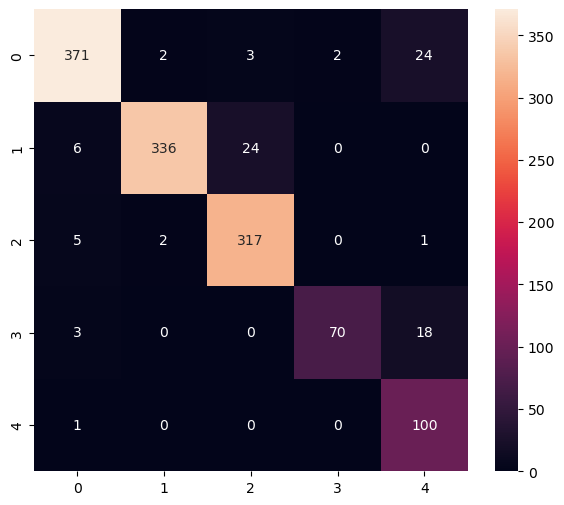

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       402
           1       0.99      0.92      0.95       366
           2       0.92      0.98      0.95       325
           3       0.97      0.77      0.86        91
           4       0.70      0.99      0.82       101

    accuracy                           0.93      1285
   macro avg       0.91      0.92      0.90      1285
weighted avg       0.94      0.93      0.93      1285



In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [105]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [106]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmpw29_ns_0\assets


INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmpw29_ns_0\assets


6652

# Inference test

In [107]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [108]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [109]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [110]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [111]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9098349e-01 9.0138810e-03 5.4312738e-11 1.7392248e-06 7.8930123e-07]
0
